# Import

In [402]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [403]:
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')

# Preprocessing

In [404]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [405]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [406]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


## convert JSON to string

In [407]:
import json



In [408]:
movies['keywords'] = movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords'] = str(list1)

In [409]:
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'genres'] = str(list1)

In [410]:
movies['production_companies'] = movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies'] = str(list1)

In [411]:
credits['cast'] = credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index,'cast'] = str(list1)

In [412]:
credits['crew'] = credits['crew'].apply(json.loads)


In [413]:
def get_directors(x):
    for i in x:
        if i['job']=='Director':
            return  i['name']

In [414]:
credits['crew']=credits['crew'].apply(get_directors)

In [415]:
credits.rename(columns={'crew':'director'},inplace=True)

In [416]:
credits

,movie_id,title,cast,director
0,19995,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,206647,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,49026,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,49529,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton
...,...,...,...,...
4798,9367,El Mariachi,"['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...",Robert Rodriguez
4799,72766,Newlyweds,"['Edward Burns', 'Kerry Bishé', 'Marsha Dietle...",Edward Burns
4800,231617,"Signed, Sealed, Delivered","['Eric Mabius', 'Kristin Booth', 'Crystal Lowe...",Scott Smith
4801,126186,Shanghai Calling,"['Daniel Henney', 'Eliza Coupe', 'Bill Paxton'...",Daniel Hsia


In [417]:
movies.iloc[123]

budget                                                          150000000
genres                  ['Adventure', 'Action', 'Thriller', 'Science F...
homepage                                                              NaN
id                                                                    605
keywords                ['saving the world', 'artificial intelligence'...
original_language                                                      en
original_title                                     The Matrix Revolutions
overview                The human city of Zion defends itself against ...
popularity                                                      73.313918
production_companies    ['Village Roadshow Pictures', 'NPV Entertainme...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2003-11-05
revenue                                                         424988211
runtime                               

In [418]:
credits.head()

,movie_id,title,cast,director
0,19995,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,206647,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,49026,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,49529,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton


In [419]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Merge CSV

In [420]:
movies=movies.merge(credits,left_on='id',right_on='movie_id',how='left')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,director
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton


In [421]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## droping

In [422]:
movies = movies[['id', 'original_title', 'genres', 'cast', 'vote_average', 'director', 'keywords']]

In [423]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4803 non-null   int64  
 1   original_title  4803 non-null   object 
 2   genres          4803 non-null   object 
 3   cast            4803 non-null   object 
 4   vote_average    4803 non-null   float64
 5   director        4773 non-null   object 
 6   keywords        4803 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 300.2+ KB


In [424]:
movies['genres'][0]

"['Action', 'Adventure', 'Fantasy', 'Science Fiction']"

In [426]:
movies['genres']=movies['genres'].str.strip('[]').str.replace('  ','').str.replace("'",'').str.split(',')
movies['genres']

0       [Action,  Adventure,  Fantasy,  Science Fiction]
1                         [Adventure,  Fantasy,  Action]
2                           [Action,  Adventure,  Crime]
3                    [Action,  Crime,  Drama,  Thriller]
4                 [Action,  Adventure,  Science Fiction]
                              ...                       
4798                         [Action,  Crime,  Thriller]
4799                                  [Comedy,  Romance]
4800               [Comedy,  Drama,  Romance,  TV Movie]
4801                                                  []
4802                                       [Documentary]
Name: genres, Length: 4803, dtype: object

## Handling genres

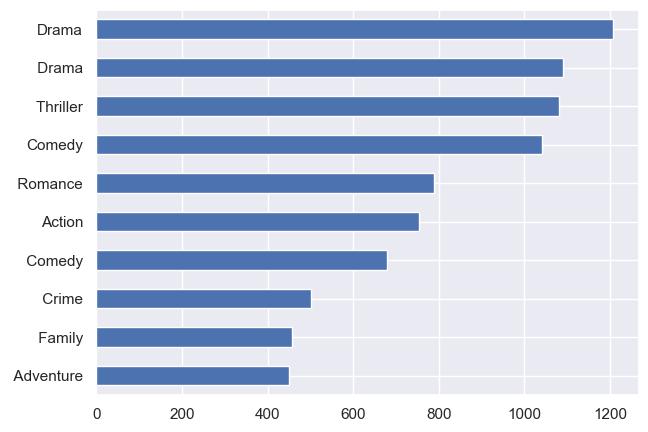

In [427]:
plt.subplots(figsize=(7,5))
list1=[]
for i in movies['genres']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh()
plt.show()


In [428]:
genre_list=pd.Series(list1).value_counts().index

In [429]:
genre_list=list(genre_list)
genre_list

['Drama',
 ' Drama',
 ' Thriller',
 'Comedy',
 ' Romance',
 'Action',
 ' Comedy',
 ' Crime',
 ' Family',
 ' Adventure',
 ' Science Fiction',
 ' Action',
 'Adventure',
 ' Fantasy',
 ' Mystery',
 'Horror',
 ' Horror',
 'Crime',
 'Thriller',
 ' History',
 ' Music',
 'Animation',
 ' War',
 'Fantasy',
 ' Animation',
 'Romance',
 'Science Fiction',
 'Documentary',
 'Family',
 ' Western',
 'Mystery',
 'Music',
 ' Foreign',
 '',
 'Western',
 'History',
 'War',
 ' Documentary',
 'TV Movie',
 ' TV Movie',
 'Foreign']

### code to binary

In [447]:
def binary_code(actual_list,check_list):
    list2=[]
    if check_list is None:
        return
    for i in actual_list:
        if i in check_list:
            list2.append(1)
        else :
            list2.append(0)
    return list2


In [431]:
movies['genres_bin']=movies['genres'].apply(lambda x: binary_code(genre_list,x))

#### Binary equivalent genres_info

In [432]:
movies['genres_bin']

0       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...
2       [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...
3       [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...
                              ...                        
4798    [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
4799    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4800    [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4801    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4802    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, Length: 4803, dtype: object

In [433]:
movies['cast']=movies['cast'].str.strip('[]').str.replace('  ','').str.replace("'",'').str.split(',')
movies['cast']

0       [Sam Worthington,  Zoe Saldana,  Sigourney Wea...
1       [Johnny Depp,  Orlando Bloom,  Keira Knightley...
2       [Daniel Craig,  Christoph Waltz,  Léa Seydoux,...
3       [Christian Bale,  Michael Caine,  Gary Oldman,...
4       [Taylor Kitsch,  Lynn Collins,  Samantha Morto...
                              ...                        
4798    [Carlos Gallardo,  Jaime de Hoyos,  Peter Marq...
4799    [Edward Burns,  Kerry Bishé,  Marsha Dietlein,...
4800    [Eric Mabius,  Kristin Booth,  Crystal Lowe,  ...
4801    [Daniel Henney,  Eliza Coupe,  Bill Paxton,  A...
4802    [Drew Barrymore,  Brian Herzlinger,  Corey Fel...
Name: cast, Length: 4803, dtype: object

## Handling Director info

handling null values

In [436]:
def na_handle(x):
    if x=='':
        return None
    else:
        return x

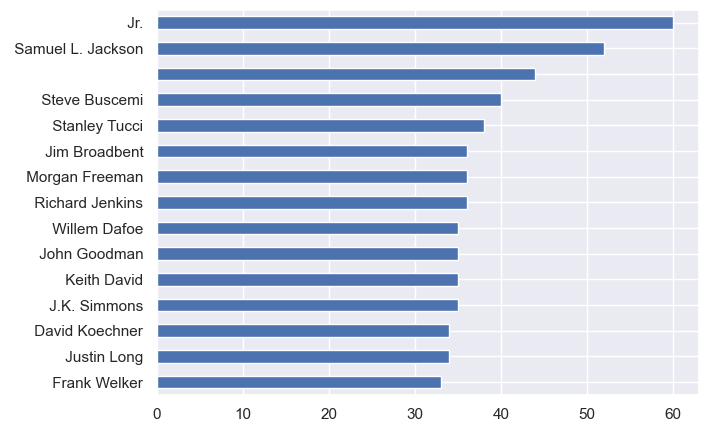

In [437]:
movies['cast']=movies['cast'].apply(na_handle)

plt.subplots(figsize=(7,5))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh()
plt.show()

In [ ]:
cast_list=list(pd.Series(list1).value_counts()[:1000].sort_values(ascending=False).index)
cast_list.remove('')


#### Code to binary

In [440]:
movies['cast_bin']=movies['cast'].apply(lambda x: binary_code(cast_list,x))
movies['cast_bin']

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
                              ...                        
4798    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4799    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4800    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4801    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4802    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: cast_bin, Length: 4803, dtype: object

In [441]:
movies.head()
movies['cast']

0       [Sam Worthington,  Zoe Saldana,  Sigourney Wea...
1       [Johnny Depp,  Orlando Bloom,  Keira Knightley...
2       [Daniel Craig,  Christoph Waltz,  Léa Seydoux,...
3       [Christian Bale,  Michael Caine,  Gary Oldman,...
4       [Taylor Kitsch,  Lynn Collins,  Samantha Morto...
                              ...                        
4798    [Carlos Gallardo,  Jaime de Hoyos,  Peter Marq...
4799    [Edward Burns,  Kerry Bishé,  Marsha Dietlein,...
4800    [Eric Mabius,  Kristin Booth,  Crystal Lowe,  ...
4801    [Daniel Henney,  Eliza Coupe,  Bill Paxton,  A...
4802    [Drew Barrymore,  Brian Herzlinger,  Corey Fel...
Name: cast, Length: 4803, dtype: object

In [442]:

movies['director']=movies['director'].apply(na_handle)

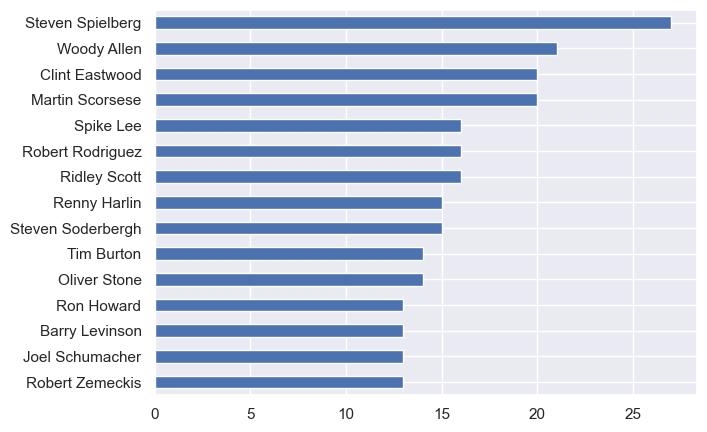

In [443]:
movies['director']=movies['director'].str.strip('[]').str.replace('  ','').str.replace("'",'').str.split(',')
movies['director']
plt.subplots(figsize=(7,5))
list1=[]
for i in movies['director']:
    if i is not None:
        list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh()
plt.show()

In [444]:
movies['director']

0           [James Cameron]
1          [Gore Verbinski]
2              [Sam Mendes]
3       [Christopher Nolan]
4          [Andrew Stanton]
               ...         
4798     [Robert Rodriguez]
4799         [Edward Burns]
4800          [Scott Smith]
4801          [Daniel Hsia]
4802     [Brian Herzlinger]
Name: director, Length: 4803, dtype: object

In [445]:
dir_list=pd.Series(list1).value_counts()[:1000].sort_values(ascending=True).index
dir_list=list(dir_list)


In [448]:
movies['director_bin']=movies['director'].apply(lambda x:binary_code(dir_list,x))

In [449]:
movies.head()

,id,original_title,genres,cast,vote_average,director,keywords,genres_bin,cast_bin,director_bin
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Wea...",7.2,[James Cameron],"['culture clash', 'future', 'space war', 'spac...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley...",6.9,[Gore Verbinski],"['ocean', 'drug abuse', 'exotic island', 'east...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,206647,Spectre,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux,...",6.3,[Sam Mendes],"['spy', 'based on novel', 'secret agent', 'seq...","[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman,...",7.6,[Christopher Nolan],"['dc comics', 'crime fighter', 'terrorist', 's...","[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morto...",6.1,[Andrew Stanton],"['based on novel', 'mars', 'medallion', 'space...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Handling Keywords

In [450]:
movies['keywords']

0       ['culture clash', 'future', 'space war', 'spac...
1       ['ocean', 'drug abuse', 'exotic island', 'east...
2       ['spy', 'based on novel', 'secret agent', 'seq...
3       ['dc comics', 'crime fighter', 'terrorist', 's...
4       ['based on novel', 'mars', 'medallion', 'space...
                              ...                        
4798    ['united states–mexico barrier', 'legs', 'arms...
4799                                                   []
4800    ['date', 'love at first sight', 'narration', '...
4801                                                   []
4802    ['obsession', 'camcorder', 'crush', 'dream girl']
Name: keywords, Length: 4803, dtype: object

In [ ]:
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')

In [ ]:
keyword_list=[]
for i in movies['keywords']:
    for j in i:
        if j not in (keyword_list):
            keyword_list.append(j)
keyword_list

In [461]:
movies['keywords_bin']=movies['keywords'].apply(lambda x: binary_code(keyword_list,x))

In [462]:
movies = movies[(movies['vote_average']!=0)] 

# Cosine Similarity

In [463]:
from scipy import spatial

In [557]:
def similarity(movieId1,movieId2):
    m1=movies.iloc[movieId1]
    m2=movies.iloc[movieId2]
    dist=spatial.distance.cosine(m1['genres_bin'],m2['genres_bin'])
    dist+=spatial.distance.cosine(m1['cast_bin'],m2['cast_bin'])
    dist+=spatial.distance.cosine(m1['keywords_bin'],m2['keywords_bin'])
    if m1['director_bin'] is not None and m2['director_bin'] is not None:
        dist+=spatial.distance.cosine(m1['director_bin'],m2['director_bin'])
    return dist

In [558]:
similarity(2,383)

3.333333333333333

In [559]:
movies['new_id']=list(range(0,movies.shape[0]))

In [560]:
movies.head()

,id,original_title,genres,cast,vote_average,director,keywords,genres_bin,cast_bin,director_bin,keywords_bin,new_id
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Wea...",7.2,[James Cameron],"[cultureclash, future, spacewar, spacecolony, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley...",6.9,[Gore Verbinski],"[ocean, drugabuse, exoticisland, eastindiatrad...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,206647,Spectre,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux,...",6.3,[Sam Mendes],"[spy, basedonnovel, secretagent, sequel, mi6, ...","[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman,...",7.6,[Christopher Nolan],"[dccomics, crimefighter, terrorist, secretiden...","[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morto...",6.1,[Andrew Stanton],"[basedonnovel, mars, medallion, spacetravel, p...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",4


In [561]:
movie=movies[movies['original_title'].str.contains('Avatar')].iloc[0]
movie.original_title


'Avatar'

In [607]:
import operator
import re

def recommend(name):
    flag=0
    for i in movies['original_title']:    
        if re.search(name, i, re.IGNORECASE):
            flag=1
        
    if flag==0:
        return

    baseMovie=movies[movies['original_title'].str.contains(name,case=False)].iloc[0]
    print('movie : ',baseMovie.original_title)
    print('\ndirector : ',str(baseMovie['director']).strip('[]'))
    print('\n: ',str(baseMovie['genres']).strip('[]').replace(' ',''))


    distances = []
    for index, movie in movies.iterrows():
        if movie['new_id'] != baseMovie['new_id']:
            dist = similarity(baseMovie['new_id'], movie['new_id'])
            distances.append((movie['new_id'], dist))
    
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    
    K = 10
    for x in range(K):
        neighbors.append(distances[x])
    
    avgRating = 0

    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating +=movies.iloc[neighbor[0]][4]  
        print( movies.iloc[neighbor[0]][1]+" | Genres: "+str(movies.iloc[neighbor[0]][2]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][4]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(baseMovie['original_title'],avgRating))
    print('The actual rating for %s is %f' %(baseMovie['original_title'],baseMovie['vote_average']))
    


In [575]:
recommend('Godfather')

movie :  The Godfather: Part III
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

c:\Users\nagas\anaconda3\lib\site-packages\scipy\spatial\distance.py:622: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)



Recommended Movies: 

Brother | Genres: 'Crime','Drama','Thriller' | Rating: 6.8
Nueve Reinas | Genres: 'Crime','Drama','Thriller' | Rating: 7.4
The Betrayed | Genres: 'Crime','Drama','Mystery','Thriller' | Rating: 5.2
Brigham City | Genres: 'Crime','Drama','Mystery','Thriller' | Rating: 7.3
Alone With Her | Genres: 'Crime','Drama','Romance','Thriller' | Rating: 6.2
Z 風暴 | Genres: 'Crime','Thriller' | Rating: 5.8
Lilja 4-Ever | Genres: 'Crime','Drama' | Rating: 7.7
Ajami | Genres: 'Crime','Drama' | Rating: 6.8
Heli | Genres: 'Crime','Drama' | Rating: 6.2
Butterfly | Genres: 'Crime','Drama' | Rating: 5.0


The predicted rating for The Godfather: Part III is: 6.440000
The actual rating for The Godfather: Part III is 7.100000


In [571]:
movies.iloc[0]

id                                                            19995
original_title                                               Avatar
genres             [Action,  Adventure,  Fantasy,  Science Fiction]
cast              [Sam Worthington,  Zoe Saldana,  Sigourney Wea...
vote_average                                                    7.2
director                                            [James Cameron]
keywords          [cultureclash, future, spacewar, spacecolony, ...
genres_bin        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, ...
cast_bin          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
director_bin      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
keywords_bin      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
new_id                                                            0
Name: 0, dtype: object

In [577]:
import warnings
warnings.filterwarnings('ignore')

In [613]:
recommend('Interstellar')

movie :  Interstellar

director :  'Christopher Nolan'

:  'Adventure','Drama','ScienceFiction'

Recommended Movies: 

End of the Spear | Genres: 'Adventure','Drama' | Rating: 6.1
Logan's Run | Genres: 'Adventure','Action','Romance','ScienceFiction' | Rating: 6.6
Megaforce | Genres: 'Adventure','Action','ScienceFiction' | Rating: 3.5
The Prisoner of Zenda | Genres: 'Adventure','Drama','Romance' | Rating: 8.4
Kurtlar vadisi - Irak | Genres: 'Adventure','Drama','Action' | Rating: 4.3
The Beast from 20,000 Fathoms | Genres: 'Adventure','Horror','ScienceFiction' | Rating: 6.7
H. | Genres: 'Thriller','Drama','ScienceFiction' | Rating: 6.5
Dawn of the Crescent Moon | Genres: 'Thriller','Drama','ScienceFiction' | Rating: 2.0
Thomas and the Magic Railroad | Genres: 'Animation','Drama','Family','ScienceFiction' | Rating: 4.6
Kicks | Genres: 'Adventure' | Rating: 7.5


The predicted rating for Interstellar is: 5.620000
The actual rating for Interstellar is 8.100000
